In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving model
import numpy as np

# 1. Load CSV file
df = pd.read_csv("zakat_allocation_dataset.csv")

# 2. Define features and target
features = [
    "Past Zakat Received (RM)", "Past Zakat Distributed (RM)", "People Helped",
    "Poverty Rate", "Unemployment Rate", "Flood Risk", "Rainfall (mm)",
    "Temperature (°C)", "Population", "Economic Index"
]
X = df[features]
y = df["Urgency Score"]

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate performance
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Model trained!")
print(f" RMSE: {rmse:.4f}")
print(f" R² Score: {r2:.4f}")

# 6. (Optional) Save trained model
joblib.dump(model, "zakat_urgency_model.pkl")


 Model trained!
 RMSE: 0.0149
 R² Score: 0.9811


['zakat_urgency_model.pkl']

<ipython-input-4-4e2aa10cfd77>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_urgency_by_state.values, y=avg_urgency_by_state.index, palette="YlOrRd")
<ipython-input-4-4e2aa10cfd77>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


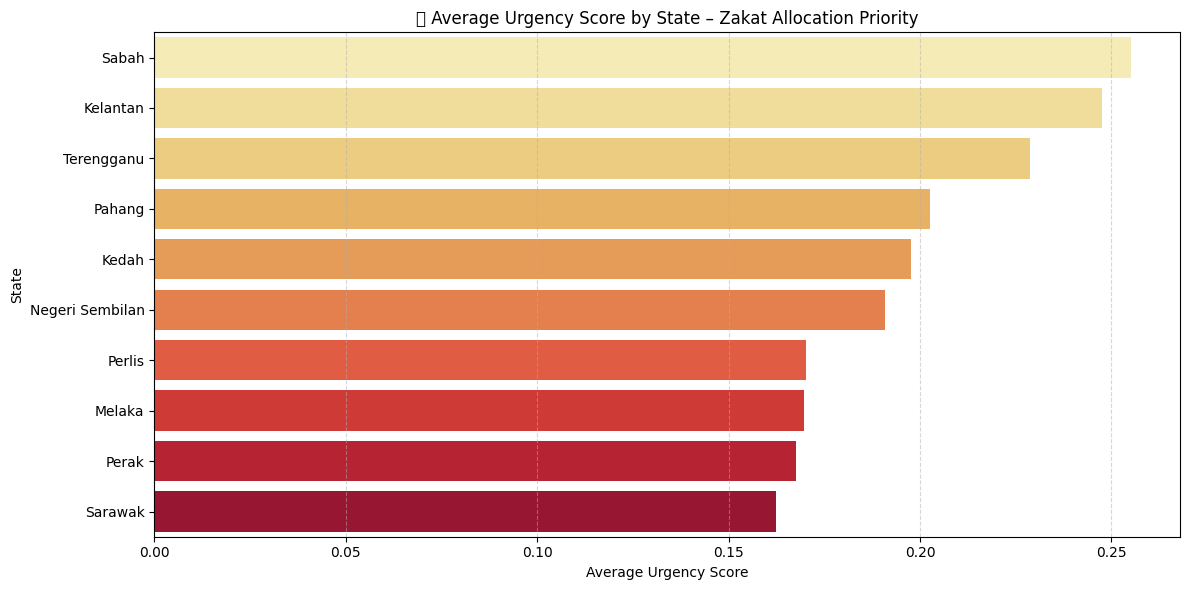

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and average urgency score
avg_urgency_by_state = df.groupby("State")["Urgency Score"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_urgency_by_state.values, y=avg_urgency_by_state.index, palette="YlOrRd")
plt.xlabel("Average Urgency Score")
plt.ylabel("State")
plt.title("📊 Average Urgency Score by State – Zakat Allocation Priority")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Dynamic Fund Allocation

In [ ]:
# Example dynamic factors
real_time_factors = {
    "Flood Risk": 1.5,  # Emergency situation: Flood-prone areas get higher weight
    "Economic Downturn": 1.2,  # Economic crisis means higher allocation to vulnerable areas
    "Weather Emergency": 1.3  # Unexpected weather disasters increase needs in affected areas
}

# Define the initial funds (Based on the latest)
total_funds = 1000000  # Example total fund (RM)

# Add dynamic adjustments based on real-time conditions (example)
df['Adjusted Urgency Score'] = df['Urgency Score']  # Start with the predicted urgency score

# Apply real-time dynamic factors to urgency score
df['Adjusted Urgency Score'] *= df['Flood Risk'] * real_time_factors.get("Flood Risk", 1)  # Flood Risk factor
df['Adjusted Urgency Score'] *= df['Economic Index'] * real_time_factors.get("Economic Downturn", 1)  # Economic factor

# Calculate total adjusted score for reallocation
total_adjusted_score = df['Adjusted Urgency Score'].sum()

# Allocate funds dynamically based on adjusted scores
df['Dynamic Fund Allocation (RM)'] = (df['Adjusted Urgency Score'] / total_adjusted_score) * total_funds

# Display updated fund allocation
print(df[['State', 'Adjusted Urgency Score', 'Dynamic Fund Allocation (RM)']])

# Optional: Save the results to CSV
df[['State', 'Adjusted Urgency Score', 'Dynamic Fund Allocation (RM)']].to_csv("dynamic_fund_allocation.csv", index=False)


        State  Adjusted Urgency Score  Dynamic Fund Allocation (RM)
0    Kelantan                0.401310                  32833.600872
1    Kelantan                0.227772                  18635.406389
2    Kelantan                0.000000                      0.000000
3    Kelantan                0.000000                      0.000000
4    Kelantan                0.328644                  26888.355448
..        ...                     ...                           ...
115   Sarawak                0.000000                      0.000000
116   Sarawak                0.367290                  30050.218694
117   Sarawak                0.000000                      0.000000
118   Sarawak                0.000000                      0.000000
119   Sarawak                0.000000                      0.000000

[120 rows x 3 columns]


Creating dashboard to visualize Fund Allocations

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px

# Assuming you have the fund allocation data in df
fig = px.bar(df, x='State', y='Dynamic Fund Allocation (RM)', color='State',
             labels={'Dynamic Fund Allocation (RM)': 'Fund Allocation (RM)', 'State': 'State'},
             title='Dynamic Fund Allocation by State')
fig.show()


Real-Time Integration: Implement weather and economic data APIs to update fund allocations dynamically

In [ ]:
pip install requests


In [ ]:
import requests
import json

API_KEY = '20c812cb53c4ec3517a0df4578e657b5'  # Replace with your API key
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"

def get_weather_data(city):
    complete_url = BASE_URL + "q=" + city + ",MY" + "&appid=" + API_KEY
    response = requests.get(complete_url)
    data = response.json()

    # Print the entire response for debugging
    print(json.dumps(data, indent=4))  # Pretty-print the response JSON

    if data["cod"] != "200":  # Check if API response is valid
        print(f"City {city} not found.")
        return None, None

    # Check if expected keys exist
    if "main" not in data or "weather" not in data:
        print("Error: Missing expected weather data.")
        return None, None

    main_data = data["main"]
    weather_data = data["weather"][0]
    temperature = main_data.get("temp", None)
    weather_desc = weather_data.get("description", None)

    if temperature is not None:
        temperature -= 273.15  # Convert from Kelvin to Celsius

    return temperature, weather_desc



# Example usage for a state
state_name = "Kuala Lumpur"  # Replace with your state
temperature, weather_desc = get_weather_data(state_name)
print(f"Temperature in {state_name}: {temperature}°C, Weather: {weather_desc}")


{
    "cod": 401,
    "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."
}
City Kuala Lumpur not found.
Temperature in Kuala Lumpur: None°C, Weather: None
